In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import random
random.seed(0)
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
df_raw=pd.read_csv("Train_Dataset.csv")
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [ ]:
df_raw.describe()

,ID,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_1,Score_Source_2,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
count,1.218560e+05,118275.000000,118232.000000,118221.000000,118195.000000,118218.000000,41761.000000,121856.000000,121856.000000,121856.000000,119446.000000,119447.000000,119428.000000,118193.000000,53021.000000,116170.000000,59928.000000,118192.000000,103316.000000,121856.000000
mean,1.216093e+07,0.342854,0.332262,0.499175,0.692060,0.417779,12.157324,0.999992,0.200499,0.281201,2.154329,2.030038,3.159736,12.063100,0.501213,0.518625,0.117428,962.106056,1.891082,0.080792
std,3.517694e+04,0.474665,0.471026,0.500001,0.461644,0.728802,12.056079,0.002865,0.400375,0.449587,0.912686,0.504407,1.759045,3.280695,0.211204,0.740248,0.107974,827.976726,1.861921,0.272517
min,1.210000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.014568,0.000005,0.000000,0.000000,0.000000,0.000000
25%,1.213046e+07,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.333481,0.390164,0.057700,272.000000,0.000000,0.000000
50%,1.216093e+07,0.000000,0.000000,0.000000,1.000000,0.000000,9.000000,1.000000,0.000000,0.000000,2.000000,2.000000,3.000000,12.000000,0.504657,0.564978,0.088700,755.000000,1.000000,0.000000
75%,1.219139e+07,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000,0.000000,1.000000,3.000000,2.000000,5.000000,14.000000,0.673890,0.664011,0.148500,1570.000000,3.000000,0.000000
max,1.222186e+07,1.000000,1.000000,1.000000,1.000000,19.000000,69.000000,1.000000,1.000000,1.000000,16.000000,3.000000,6.000000,23.000000,0.945741,100.000000,1.000000,4185.000000,22.000000,1.000000


In [ ]:
df_raw.loc[df_raw.Own_House_Age >0, 'House_Own'] = 1
df_raw.loc[df_raw.House_Own== 0, 'Own_House_Age'] = 0
df_raw.loc[df_raw.Type_Organization== "Not Working", 'Client_Occupation'] = "Not Working"
df_raw.loc[df_raw.Type_Organization== "Self-employed", 'Client_Occupation'] = "Self-employed"

df_raw["Loan_Annuity"]=df_raw["Loan_Annuity"].replace(["#VALUE!"],np.nan)
df_raw["Loan_Annuity"]=df_raw["Loan_Annuity"].replace(["$"],np.nan)
df_raw["Loan_Annuity"]=df_raw["Loan_Annuity"].apply(pd.to_numeric)

#df_raw.loc[df_raw.Type_Organization== "Not Working", 'Client_Income'] = "0"
#df_raw.loc[df_raw.Type_Organization== "Self-employed", 'Client_Income'] = "0"
df_raw["Client_Income"]=df_raw["Client_Income"].replace(["$"],np.nan)
df_raw["Client_Income"]=df_raw["Client_Income"].apply(pd.to_numeric)

df_raw["Credit_Amount"]=df_raw["Credit_Amount"].replace(["$"],np.nan)
df_raw["Credit_Amount"]=df_raw["Credit_Amount"].apply(pd.to_numeric)

df_raw["Age_Days"]=df_raw["Age_Days"].replace(["x"],np.nan)
df_raw["Age_Days"]=df_raw["Age_Days"].apply(pd.to_numeric)
df_raw["Age_Days"]=round(df_raw["Age_Days"]/365,0)

df_raw["Employed_Days"]=df_raw["Employed_Days"].replace(["x"],np.nan)
df_raw["Employed_Days"]=df_raw["Employed_Days"].apply(pd.to_numeric)
df_raw["Employed_Days"]=round(df_raw["Employed_Days"]/365,0)
df_raw["Employed_Days"]=df_raw["Employed_Days"].replace([1001],0)

df_raw["Registration_Days"]=df_raw["Registration_Days"].replace(["x"],np.nan)
df_raw["Registration_Days"]=df_raw["Registration_Days"].apply(pd.to_numeric)

df_raw["ID_Days"]=df_raw["ID_Days"].replace(["x"],np.nan)
df_raw["ID_Days"]=df_raw["ID_Days"].apply(pd.to_numeric)

df_raw["Type_Organization"]=df_raw["Type_Organization"].replace(["XNA"],'Not Working')
df_raw=df_raw[df_raw['Client_Gender']!='XNA']

df_raw["Population_Region_Relative"]=df_raw["Population_Region_Relative"].replace(["@"],np.nan)
df_raw["Population_Region_Relative"]=df_raw["Population_Region_Relative"].replace(["#"],np.nan)
sh


In [ ]:
df_raw["Score_Source_3"]=df_raw["Score_Source_3"].replace(["&"],np.nan)
df_raw['Score_Source_3']=df_raw['Score_Source_3'].apply(pd.to_numeric)

In [ ]:
for function_name in ['min', 'max', 'mean', 'nanmedian', 'var']:
    feature_name = 'Score_Sources_{}'.format(function_name.upper())
    df_raw[feature_name] = eval('np.{}'.format(function_name))(
        df_raw[['Score_Source_1', 'Score_Source_2', 'Score_Source_3']], axis=1)
df_raw['Score_Sources_Prod'] = df_raw['Score_Source_1'] * df_raw['Score_Source_2'] * df_raw['Score_Source_3']

In [ ]:
df_raw["Registration_Days"]=df_raw["Registration_Days"].apply(pd.to_numeric)

In [ ]:
#Custom Labels
df_raw['Loan_annuity_income_ratio']=df_raw['Loan_Annuity']/df_raw['Client_Income']
df_raw['Client_Income_yearly']=df_raw['Client_Income']*12
df_raw['Credit_income_ratio']=df_raw['Credit_Amount']/df_raw['Client_Income']
df_raw['Credit_term']=df_raw['Credit_Amount']/df_raw['Loan_Annuity']
df_raw['Years_employed_age_ratio']=df_raw["Employed_Days"]/df_raw["Age_Days"]

In [ ]:
df_raw.columns

Index(['ID', 'Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan',
       'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity',
       'Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days',
       'Employed_Days', 'Registration_Days', 'ID_Days', 'Own_House_Age',
       'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Occupation',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_1', 'Score_Source_2',
       'Score_Source_3', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau', 'Default', 'Score_Sources_MIN', 'Score_Sources_MAX',
       'Score_Sources_MEAN', 'Score_Sources_NANMEDIAN', 'Score_Sources_VAR',
       'Score_Sources_Prod', 'L

<AxesSubplot:xlabel='Default', ylabel='count'>

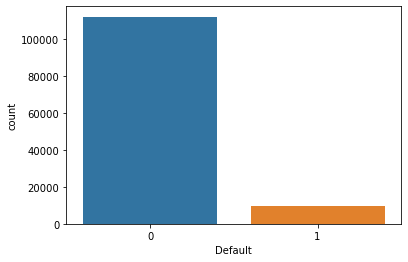

In [ ]:
sns.countplot(df_raw['Default'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df_raw["Accompany_Client"]=encoder.fit_transform(df_raw["Accompany_Client"])
df_raw["Client_Income_Type"]=encoder.fit_transform(df_raw["Client_Income_Type"])
df_raw["Client_Education"]=encoder.fit_transform(df_raw["Client_Education"])
df_raw["Client_Marital_Status"]=encoder.fit_transform(df_raw["Client_Marital_Status"])
df_raw["Client_Gender"]=encoder.fit_transform(df_raw["Client_Gender"])
df_raw["Loan_Contract_Type"]=encoder.fit_transform(df_raw["Loan_Contract_Type"])
df_raw["Client_Housing_Type"]=encoder.fit_transform(df_raw["Client_Housing_Type"])

df_raw["Client_Occupation"]=encoder.fit_transform(df_raw["Client_Occupation"])
df_raw["Type_Organization"]=encoder.fit_transform(df_raw["Type_Organization"])
df_raw["Client_Permanent_Match_Tag"]=encoder.fit_transform(df_raw["Client_Permanent_Match_Tag"])
df_raw["Client_Contact_Work_Tag"]=encoder.fit_transform(df_raw["Client_Contact_Work_Tag"])


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121853 entries, 0 to 121855
Data columns (total 51 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121853 non-null  int64  
 1   Client_Income               118231 non-null  float64
 2   Car_Owned                   118272 non-null  float64
 3   Bike_Owned                  118229 non-null  float64
 4   Active_Loan                 118218 non-null  float64
 5   House_Own                   119445 non-null  float64
 6   Child_Count                 118215 non-null  float64
 7   Credit_Amount               118216 non-null  float64
 8   Loan_Annuity                117027 non-null  float64
 9   Accompany_Client            121853 non-null  int32  
 10  Client_Income_Type          121853 non-null  int32  
 11  Client_Education            121853 non-null  int32  
 12  Client_Marital_Status       121853 non-null  int32  
 13  Client_Gender 

In [ ]:
missing_data_train = df_raw.isnull()
most_missing = pd.DataFrame(columns=['Column','Percentage'])

for column in missing_data_train.columns.values.tolist(): 
    
    if (np.sum(missing_data_train[column])/missing_data_train[column].count()*100)>20:
        most_missing = most_missing.append({'Column': column,'Percentage':np.sum(missing_data_train[column])/missing_data_train[column].count()*100}, ignore_index=True)
    else:
        continue

In [ ]:
most_missing

,Column,Percentage
0,Own_House_Age,46.249169
1,Score_Source_1,56.489377
2,Score_Source_3,22.093834
3,Social_Circle_Default,50.821892
4,Score_Sources_Prod,67.139094


In [ ]:
df_raw=df_raw.drop(most_missing['Column'],axis=1)
df_raw=df_raw.drop('ID',axis=1)

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121853 entries, 0 to 121855
Data columns (total 45 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Client_Income               118231 non-null  float64
 1   Car_Owned                   118272 non-null  float64
 2   Bike_Owned                  118229 non-null  float64
 3   Active_Loan                 118218 non-null  float64
 4   House_Own                   119445 non-null  float64
 5   Child_Count                 118215 non-null  float64
 6   Credit_Amount               118216 non-null  float64
 7   Loan_Annuity                117027 non-null  float64
 8   Accompany_Client            121853 non-null  int32  
 9   Client_Income_Type          121853 non-null  int32  
 10  Client_Education            121853 non-null  int32  
 11  Client_Marital_Status       121853 non-null  int32  
 12  Client_Gender               121853 non-null  int32  
 13  Loan_Contract_

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='median')
df_raw=imputer.fit_transform(df_raw)


In [ ]:
df=pd.DataFrame(df_raw,columns=['Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan',
       'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity',
       'Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days',
       'Employed_Days', 'Registration_Days', 'ID_Days',
       'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Occupation',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_2',
        'Phone_Change','Credit_Bureau', 'Default', 'Score_Sources_MIN', 'Score_Sources_MAX',
       'Score_Sources_MEAN', 'Score_Sources_NANMEDIAN', 'Score_Sources_VAR',
       'Loan_annuity_income_ratio',
       'Client_Income_yearly', 'Credit_income_ratio', 'Credit_term',
       'Years_employed_age_ratio'])

In [ ]:
df["Default"]

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
121848    1.0
121849    0.0
121850    0.0
121851    0.0
121852    0.0
Name: Default, Length: 121853, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121853 entries, 0 to 121852
Data columns (total 45 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Client_Income               121853 non-null  float64
 1   Car_Owned                   121853 non-null  float64
 2   Bike_Owned                  121853 non-null  float64
 3   Active_Loan                 121853 non-null  float64
 4   House_Own                   121853 non-null  float64
 5   Child_Count                 121853 non-null  float64
 6   Credit_Amount               121853 non-null  float64
 7   Loan_Annuity                121853 non-null  float64
 8   Accompany_Client            121853 non-null  float64
 9   Client_Income_Type          121853 non-null  float64
 10  Client_Education            121853 non-null  float64
 11  Client_Marital_Status       121853 non-null  float64
 12  Client_Gender               121853 non-null  float64
 13  Loan_Contract_

In [ ]:
X=df.drop("Default",axis=1)
y=df["Default"]
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=40,stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

#Logistic Regression
Log_model=LogisticRegression(random_state=30,solver='liblinear')
Log_model.fit(X_train,y_train)

#Predicting Test and Train data
y_train_pred=Log_model.predict(X_train)
y_test_pred=Log_model.predict(X_test)

#Obtaining Acurracy Score
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score
train_accuracy=accuracy_score(y_train,y_train_pred)
test_accuracy=accuracy_score(y_test,y_test_pred)
test_roc_acc=roc_auc_score(y_test,y_test_pred)
print("Train data accuracy for Logistic Regression Model: {0:2.2f}%".format(train_accuracy*100))
print("Test data accuracy for Logistic Regression Model: {0:2.2f}%".format(test_accuracy*100))
print("Test data roc-auc accuracy for Logistic Regression Model: {0:2.2f}%".format(test_roc_acc*100))

Train data accuracy for Logistic Regression Model: 91.91%
Test data accuracy for Logistic Regression Model: 91.92%
Test data roc-auc accuracy for Logistic Regression Model: 50.16%


In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     22402
         1.0       0.47      0.00      0.01      1969

    accuracy                           0.92     24371
   macro avg       0.69      0.50      0.48     24371
weighted avg       0.88      0.92      0.88     24371



<AxesSubplot:title={'center':'Confusion Matrix for LR Model Test Data'}>

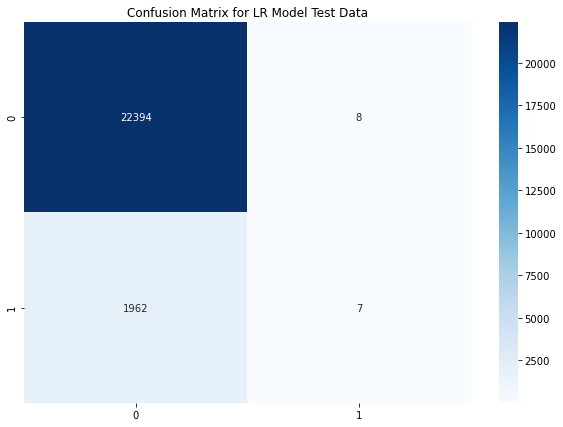

In [ ]:
#Confusion Matrix
conf_mat=confusion_matrix(y_test,y_test_pred)
conf_mat_df=pd.DataFrame(conf_mat)

conf_train=confusion_matrix(y_train,y_train_pred)
conf_train_df=pd.DataFrame(conf_train)

plt.figure(figsize = (10,7))
plt.title("Confusion Matrix for LR Model Test Data")
sns.heatmap(conf_mat_df, annot=True,cmap='Blues', fmt='g')

In [ ]:
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
from xgboost import XGBClassifier
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)


[21:10:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
from sklearn import metrics
# evaluate predictions
accuracy = metrics.accuracy_score(y_test, y_pred)
xg_roc=roc_auc_score(y_test,y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Test data roc-auc accuracy for Logistic Regression Model: {0:2.2f}%".format(test_roc_acc*100))

Accuracy: 91.24%
Test data roc-auc accuracy for Logistic Regression Model: 50.16%


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95     22402
         1.0       0.36      0.11      0.17      1969

    accuracy                           0.91     24371
   macro avg       0.64      0.55      0.56     24371
weighted avg       0.88      0.91      0.89     24371



In [ ]:
X_s=df.drop("Default",axis=1)
y_s=df["Default"]
# K-fold cross validation for Support Vector
from sklearn.model_selection import KFold
from sklearn import metrics
skf=KFold(n_splits=10,shuffle=True,random_state=0)
i=1
cv_score=[]
for train,test in skf.split(X_s,y_s):
    print('{} of KFold {}'.format(i,skf.n_splits))
    train_X, test_X = X_s.loc[train], X_s.loc[test] 
    train_y, test_y = y_s.loc[train], y_s.loc[test]
    
    #SVC Model
    xgb_clf=XGBClassifier() #call the function
    xgb_clf.fit(train_X,train_y)# fit the model
    #make prediction
    xgb_clf_test_pred=xgb_clf.predict(test_X)
    xgb_clf_train_pred=xgb_clf.predict(train_X)
    score=metrics.f1_score(test_y,xgb_clf_test_pred)
    print("Accuracy for test data: {}".format(score))
    cv_score.append(score)    
    i+=1

In [ ]:
# Creating an object for model and fitting it on training data set 
import lightgbm 
from lightgbm import LGBMClassifier 
model = LGBMClassifier() 
model.fit(X_train, y_train) 
  
# Predicting the Target variable 
pred = model.predict(X_test) 
lgm_roc=roc_auc_score(y_test,pred)
print(pred) 
accuracy = model.score(X_test, y_test) 
print(lgm_roc)

In [ ]:
print(classification_report(y_test,pred))

## Hyper Parameter Tunning

In [ ]:
# Sample 16000 rows (10000 for training, 6000 for testing)
features = df.sample(n = 16000, random_state = 42)
# Extract the labels
labels = np.array(features['Default'].astype(np.int32)).reshape((-1, ))
features = features.drop(columns = ['Default'])

# Split into training and testing data
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 6000, random_state = 42)

print('Train shape: ', train_features.shape)
print('Test shape: ', test_features.shape)

train_features.head()

Train shape:  (10000, 44)
Test shape:  (6000, 44)


,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,...,Score_Sources_MIN,Score_Sources_MAX,Score_Sources_MEAN,Score_Sources_NANMEDIAN,Score_Sources_VAR,Loan_annuity_income_ratio,Client_Income_yearly,Credit_income_ratio,Credit_term,Years_employed_age_ratio
34877,18000.0,0.0,0.0,1.0,0.0,0.0,51856.2,2069.55,1.0,8.0,...,0.531686,0.764768,0.681893,0.749225,0.011321,0.114975,216000.0,2.880900,25.056751,0.288462
63098,18000.0,1.0,1.0,0.0,1.0,0.0,126450.0,5027.85,1.0,5.0,...,0.485748,0.515495,0.500622,0.500622,0.000221,0.279325,216000.0,7.025000,25.149915,0.088889
110992,45000.0,1.0,0.0,1.0,1.0,0.0,90000.0,4500.00,1.0,5.0,...,0.741920,0.741920,0.741920,0.741920,0.000000,0.100000,540000.0,2.000000,20.000000,0.172414
72846,67500.0,0.0,0.0,0.0,0.0,0.0,100692.0,4549.95,1.0,1.0,...,0.113922,0.852421,0.573191,0.753229,0.107104,0.067407,810000.0,1.491733,22.130353,0.196078
117114,7200.0,0.0,0.0,1.0,0.0,0.0,105750.0,3091.95,1.0,4.0,...,0.328063,0.766161,0.547112,0.547112,0.047982,0.429437,86400.0,14.687500,34.201717,0.000000


In [ ]:
import lightgbm as lgb
N_FOLDS=5

model = lgb.LGBMClassifier(random_state=50)

# Training set
train_set = lgb.Dataset(train_features, label = train_labels)
test_set = lgb.Dataset(test_features, label = test_labels)

hyperparameters = model.get_params()

# Using early stopping to determine number of estimators.
del hyperparameters['n_estimators']

# Perform cross validation with early stopping
cv_results = lgb.cv(hyperparameters, train_set, num_boost_round = 10000, nfold = N_FOLDS, metrics = 'auc', 
           early_stopping_rounds = 100, verbose_eval = False, seed = 42)

# Highest score
best = cv_results['auc-mean'][-1]

# Standard deviation of best score
best_std = cv_results['auc-stdv'][-1]

print('The maximium ROC AUC in cross validation was {:.5f} with std of {:.5f}.'.format(best, best_std))
print('The ideal number of iterations was {}.'.format(len(cv_results['auc-mean'])))

[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4519
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 43
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Auto-c

In [ ]:
from sklearn.metrics import roc_auc_score
model.n_estimators = len(cv_results['auc-mean'])

# Train and make predicions with model
model.fit(train_features, train_labels)
preds = model.predict_proba(test_features)[:, 1]
baseline_auc = roc_auc_score(test_labels, preds)

print('The baseline model scores {:.5f} ROC AUC on the test set.'.format(baseline_auc))

The baseline model scores 0.71817 ROC AUC on the test set.


In [ ]:
N_FOLDS=5
import csv
from hyperopt import STATUS_OK
from timeit import default_timer as timer

def objective(hyperparameters):
    """Objective function for Gradient Boosting Machine Hyperparameter Optimization.
       Writes a new line to `outfile` on every iteration"""
    
    # Keep track of evals
    global ITERATION
    
    ITERATION += 1
    
    # Using early stopping to find number of trees trained
    if 'n_estimators' in hyperparameters:
        del hyperparameters['n_estimators']
    
    # Retrieve the subsample
    subsample = hyperparameters['boosting_type'].get('subsample', 1.0)
    
    # Extract the boosting type and subsample to top level keys
    hyperparameters['boosting_type'] = hyperparameters['boosting_type']['boosting_type']
    hyperparameters['subsample'] = subsample
    
    # Make sure parameters that need to be integers are integers
    for parameter_name in ['num_leaves', 'min_child_samples']:#, 'subsample_for_bin'
        hyperparameters[parameter_name] = int(hyperparameters[parameter_name])

    start = timer()
    
    # Perform n_folds cross validation
    cv_results = lgb.cv(hyperparameters, train_set, num_boost_round = 10000, nfold = N_FOLDS, 
                        early_stopping_rounds = 100, metrics = 'auc', seed = 50)

    run_time = timer() - start
    
    # Extract the best score
    best_score = cv_results['auc-mean'][-1]
    
    # Loss must be minimized
    loss = 1 - best_score
    
    # Boosting rounds that returned the highest cv score
    n_estimators = len(cv_results['auc-mean'])
    
    # Add the number of estimators to the hyperparameters
    hyperparameters['n_estimators'] = n_estimators

    # Write to the csv file ('a' means append)
    of_connection = open(OUT_FILE, 'a')
    writer = csv.writer(of_connection)
    writer.writerow([loss, hyperparameters, ITERATION, run_time, best_score])
    of_connection.close()

    # Dictionary with information for evaluation
    return {'loss': loss, 'hyperparameters': hyperparameters, 'iteration': ITERATION,
            'train_time': run_time, 'status': STATUS_OK}

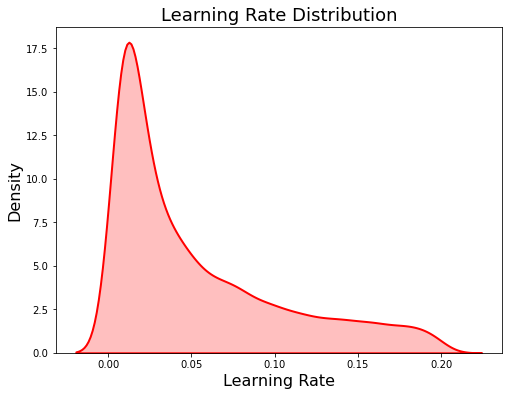

In [ ]:
from hyperopt import hp
from hyperopt.pyll.stochastic import sample

# Create the learning rate
learning_rate = {'learning_rate': hp.loguniform('learning_rate', np.log(0.005), np.log(0.2))}

learning_rate_dist = []

# Draw 10000 samples from the learning rate domain
for _ in range(10000):
    learning_rate_dist.append(sample(learning_rate)['learning_rate'])
    
plt.figure(figsize = (8, 6))
sns.kdeplot(learning_rate_dist, color = 'red', linewidth = 2, shade = True);
plt.title('Learning Rate Distribution', size = 18); plt.xlabel('Learning Rate', size = 16); plt.ylabel('Density', size = 16);

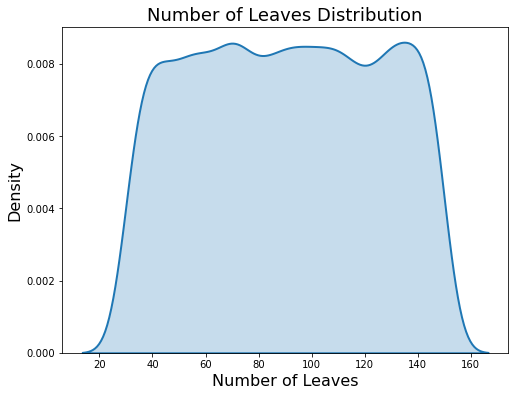

In [ ]:
# Discrete uniform distribution
num_leaves = {'num_leaves': hp.quniform('num_leaves', 30, 150, 1)}
num_leaves_dist = []

# Sample 10000 times from the number of leaves distribution
for _ in range(10000):
    num_leaves_dist.append(sample(num_leaves)['num_leaves'])
    
# kdeplot
plt.figure(figsize = (8, 6))
sns.kdeplot(num_leaves_dist, linewidth = 2, shade = True);
plt.title('Number of Leaves Distribution', size = 18); plt.xlabel('Number of Leaves', size = 16); plt.ylabel('Density', size = 16);

In [ ]:
# boosting type domain 
boosting_type = {'boosting_type': hp.choice('boosting_type', 
                                            [{'boosting_type': 'gbdt', 'subsample': hp.uniform('subsample', 0.5, 1)}, 
                                             {'boosting_type': 'dart', 'subsample': hp.uniform('subsample', 0.5, 1)},
                                             {'boosting_type': 'goss', 'subsample': 1.0}])}

# Draw a sample
hyperparams = sample(boosting_type)
hyperparams

{'boosting_type': {'boosting_type': 'goss', 'subsample': 1.0}}

In [ ]:
# Retrieve the subsample if present otherwise set to 1.0
subsample = hyperparams['boosting_type'].get('subsample', 1.0)

# Extract the boosting type
hyperparams['boosting_type'] = hyperparams['boosting_type']['boosting_type']
hyperparams['subsample'] = subsample

hyperparams

{'boosting_type': 'goss', 'subsample': 1.0}

In [ ]:
# Define the search space
space = {
    'boosting_type': hp.choice('boosting_type', 
                                            [{'boosting_type': 'gbdt', 'subsample': hp.uniform('gdbt_subsample', 0.5, 1)}, 
                                             {'boosting_type': 'dart', 'subsample': hp.uniform('dart_subsample', 0.5, 1)},
                                             {'boosting_type': 'goss', 'subsample': 1.0}]),
    'num_leaves': hp.quniform('num_leaves', 20, 150, 1),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.5)),
    #'subsample_for_bin': hp.quniform('subsample_for_bin', 20000, 100000, 20000),
    'min_child_samples': hp.quniform('min_child_samples', 20, 500, 5),
    'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
    'colsample_bytree': hp.uniform('colsample_by_tree', 0.6, 1.0),
    'is_unbalance': hp.choice('is_unbalance', [True, False]),
}

# Sample from the full space
x = sample(space)

# Conditional logic to assign top-level keys
subsample = x['boosting_type'].get('subsample', 1.0)
x['boosting_type'] = x['boosting_type']['boosting_type']
x['subsample'] = subsample
#x['subsample_for_bin']=int(x['subsample_for_bin'])
x

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.8227127425282531,
 'is_unbalance': False,
 'learning_rate': 0.06470811177878796,
 'min_child_samples': 200.0,
 'num_leaves': 109.0,
 'reg_alpha': 0.7113203006125024,
 'reg_lambda': 0.8318413000732519,
 'subsample': 0.5612689618704523}

In [ ]:
# Create a new file and open a connection
OUT_FILE = 'bayes_test.csv'
of_connection = open(OUT_FILE, 'w')
writer = csv.writer(of_connection)

ITERATION = 0

# Write column names
headers = ['loss', 'hyperparameters', 'iteration', 'runtime', 'score']
writer.writerow(headers)
of_connection.close()

# Test the objective function
results = objective(sample(space))
print('The cross validation loss = {:.5f}.'.format(results['loss']))
print('The optimal number of estimators was {}.'.format(results['hyperparameters']['n_estimators']))

[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001747 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4519
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 43
[LightGBM] [Info] Using GOSS
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can se

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [ ]:
from hyperopt import tpe

# Create the algorithm
tpe_algorithm = tpe.suggest

from hyperopt import Trials

# Record results
trials = Trials()

# Create a file and open a connection
OUT_FILE = 'bayes_test.csv'
of_connection = open(OUT_FILE, 'w')
writer = csv.writer(of_connection)

ITERATION = 0

# Write column names
headers = ['loss', 'hyperparameters', 'iteration', 'runtime', 'score']
writer.writerow(headers)
of_connection.close()

In [ ]:
from hyperopt import fmin
MAX_EVALS=5
# Global variable
global  ITERATION

ITERATION = 0

# Run optimization
best = fmin(fn = objective, space = space, algo = tpe.suggest, trials = trials,
            max_evals = MAX_EVALS)

best



[LightGBM] [Warning]                                                                                                   
Unknown parameter: importance_type                                                                                     
[LightGBM] [Warning]                                                                                                   
Unknown parameter: silent                                                                                              
[LightGBM] [Warning]                                                                                                   
Unknown parameter: importance_type                                                                                     
[LightGBM] [Warning]                                                                                                   
Unknown parameter: silent                                                                                              
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                                                                                                   
No further splits with positive gain, best gain: -inf                                                                  
[LightGBM] [Warning]                    

In [ ]:
# Sort the trials with lowest loss (highest AUC) first
trials_dict = sorted(trials.results, key = lambda x: x['loss'])
trials_dict[:1]

In [ ]:
results = pd.read_csv(OUT_FILE)

In [ ]:
import ast

def evaluate(results, name):
    
    new_results = results.copy()
    # String to dictionary
    new_results['hyperparameters'] = new_results['hyperparameters'].map(ast.literal_eval)
    
    # Sort with best values on top
    new_results = new_results.sort_values('score', ascending = False).reset_index(drop = True)
    
    # Print out cross validation high score
    print('The highest cross validation score from {} was {:.5f} found on iteration {}.'.format(name, new_results.loc[0, 'score'], new_results.loc[0, 'iteration']))
    
    # Use best hyperparameters to create a model
    hyperparameters = new_results.loc[0, 'hyperparameters']
    model = lgb.LGBMClassifier(**hyperparameters)
    
    # Train and make predictions
    model.fit(train_features, train_labels)
    preds = model.predict_proba(test_features)[:, 1]
    
    print('ROC AUC from {} on test data = {:.5f}.'.format(name, roc_auc_score(test_labels, preds)))
    
    # Create dataframe of hyperparameters
    hyp_df = pd.DataFrame(columns = list(new_results.loc[0, 'hyperparameters'].keys()))

    # Iterate through each set of hyperparameters that were evaluated
    for i, hyp in enumerate(new_results['hyperparameters']):
        hyp_df = hyp_df.append(pd.DataFrame(hyp, index = [0]), 
                               ignore_index = True)
        
    # Put the iteration and score in the hyperparameter dataframe
    hyp_df['iteration'] = new_results['iteration']
    hyp_df['score'] = new_results['score']
    
    return hyp_df


In [ ]:
bayes_results = evaluate(results, name = 'Bayesian')
bayes_results.info()

In [ ]:
# Create a new file and open a connection
OUT_FILE = 'bayesian_trials_1000.csv'
of_connection = open(OUT_FILE, 'w')
writer = csv.writer(of_connection)

# Write column names
headers = ['loss', 'hyperparameters', 'iteration', 'runtime', 'score']
writer.writerow(headers)
of_connection.close()

# Record results
trials = Trials()

# global ITERATION

ITERATION = 0 

best = fmin(fn = objective, space = space, algo = tpe.suggest,
           trials = trials, max_evals = 10)

 # Sort the trials with lowest loss (highest AUC) first
trials_dict = sorted(trials.results, key = lambda x: x['loss'])

print('Finished, best results')
print(trials_dict[:1])

# Save the trial results
with open('trials.json', 'w') as f:
    f.write(json.dumps(trials_dict))